In [1]:
using HiddenMarkovModels
using DriftDiffusionModels
using Plots

In [2]:
# Create a true HMMDDM
true_trans = [0.9 0.1; 0.2 0.8]
true_init = [0.99, 0.01]

B_1 = 12
v1 = 1.25
a_0 = 0.0

B_2 = 2
v1 = 2.0
a_0 = -0.5

DDM1 = DriftDiffusionModel(B_1, v1, a_0, 1.0)
DDM2 = DriftDiffusionModel(B_2, v1, a_0, 1.0)

dists_true = [DDM1, DDM2]

hmm = HMM(true_init, true_trans, dists_true)

# sample from the true model
state_seq_true, obs_seq_true = rand(hmm, 10000)

(state_seq = [1, 1, 1, 1, 1, 1, 2, 2, 1, 1  …  2, 2, 2, 2, 2, 1, 1, 1, 1, 1], obs_seq = DDMResult[DDMResult(4.615564992466362, 1), DDMResult(5.504033383354766, -1), DDMResult(4.344932688258927, -1), DDMResult(5.402002921964315, -1), DDMResult(4.986830372226523, -1), DDMResult(5.925044001387252, -1), DDMResult(0.534801995751614, 1), DDMResult(0.20259348159837776, -1), DDMResult(5.371139864585552, -1), DDMResult(6.226392561523402, -1)  …  DDMResult(1.1268536428382667, -1), DDMResult(1.5875964697859704, -1), DDMResult(1.3284832338692907, -1), DDMResult(0.27869920797157194, -1), DDMResult(0.8079649589787415, -1), DDMResult(5.0182183097106865, -1), DDMResult(6.575677150679579, -1), DDMResult(5.01409547645131, -1), DDMResult(5.969926671769436, -1), DDMResult(5.886606645240519, -1)])

In [4]:
# fit a naive hmm to the data
trans_guess = [0.95 0.05; 0.05 0.95]
init_guess = [0.5, 0.5]

B_1_guess = 10
v1_guess = 1.0
a_0_guess = 0.0

B_2_guess = 1
v2_guess = 1.0
a_0_guess = 0.0

DDM1_guess = DriftDiffusionModel(B_1_guess, v1_guess, a_0_guess, 1.0)
DDM2_guess = DriftDiffusionModel(B_2_guess, v2_guess, a_0_guess, 1.0)

dists_guess = [DDM1_guess, DDM2_guess]

hmm_guess = HMM(init_guess, trans_guess, dists_guess)

hmm_est, lls = baum_welch(hmm_guess, obs_seq_true)

(Hidden Markov Model with:
 - initialization: [1.0, 1.5245022668635673e-21]
 - transition matrix: [0.8989244565650278 0.10107554343497212; 0.19805708450785797 0.801942915492142]
 - observation distributions: [DriftDiffusionModel(11.98032796753527, 1.993811454372941, -0.500351194271695, 1.0), DriftDiffusionModel(1.9772284269213012, 1.9311002873389544, -0.5048406077721009, 1.0)], [-26404.388302652125, -16334.370503599652, -15966.297537551698, -15780.698344318102, -15759.461978505862, -15759.029541655002, -15759.02424165911, -15759.024180013525, -15759.02417930042])

In [5]:
posterior = forward(hmm_est, obs_seq_true)

([1.0 0.9999927324422359 … 0.9999969290329671 0.9999964560000522; 1.1002500510609824e-23 7.267557764196851e-6 … 3.0709670327869298e-6 3.543999947964914e-6], [-15759.02417929228])

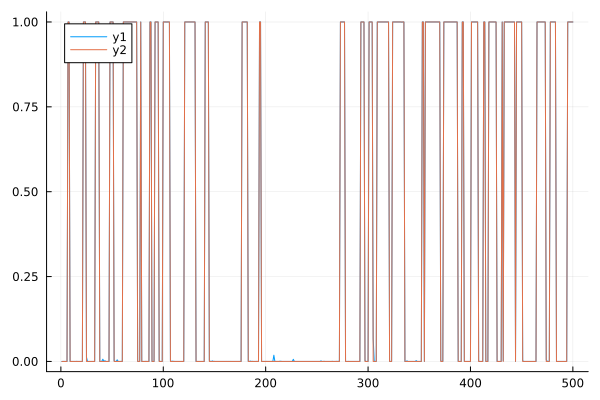

In [28]:
plot(posterior[1]'[1:500, 2])
plot!(state_seq_true[1:500] .- 1)